In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pylab as plt

# Rejection sampling

### Algorithm
Assume $\int_a^b f(x)dx = 1$ and choose $m > f(x)$ for all $x\in[a,b]$. Simulate $(x', u) \sim \mathcal{U}(0<u<m)$ as follows:
   1. Simulate $x' \sim \mathcal{U}(a, b)$,
   2. Simulate $u|x=x' \sim \mathcal{U}(0, m)$,
   3. Accept the sample if $0<u<f(x')$.

## Example

In the toy example let us simulate `nsamples` samples from the beta distribution `ss.beta` with parameters `a` and `b`. We stick with the basic rejection sampling, interested students can try rejection sampling with another - preferably more suitable - proposal.

In [2]:
nsamples = 10000     ### Number of samples
M = 1.7              ### M

a = 2
b = 2

samples_x = np.random.uniform(0, 1, size=nsamples)             # proposal samples
samples_u = np.random.uniform(low=0., high=M, size=nsamples)   # uniform samples
fx = ss.beta.pdf(samples_x, a=a, b=b)                          # value of f(x)
accepted = np.where(samples_u < fx)[0]

% acceptance: 0.5891 (5891 of 10000)


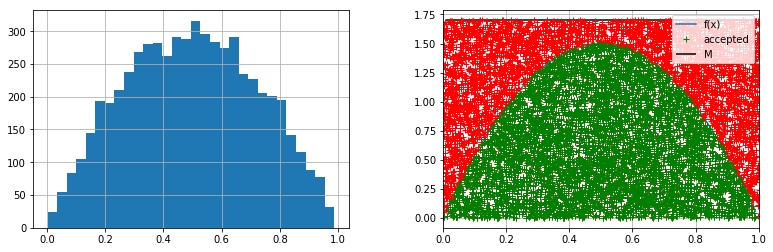

In [3]:
print("% acceptance: {0:.4f} ({1} of {2})".format(accepted.size/nsamples, accepted.size, nsamples))
plt.figure(figsize=(13, 4))
plt.subplot(121)
plt.hist(samples_x[accepted], bins=30)
plt.subplot(122)
x = np.linspace(.01, .99, 100)
plt.plot(x, ss.beta.pdf(x, a=a, b=b), label='f(x)')
plt.hlines(M, x.min(), x.max(), label='M')
plt.plot(samples_x, samples_u, 'r+')
plt.plot(samples_x[accepted], samples_u[accepted], 'g+', label='accepted')
plt.xlim(0, 1)
plt.legend()
plt.show()